<a href="https://colab.research.google.com/github/DataBioExplorer/Calculo_metricas/blob/main/matriz_de_confusao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importação de bibliotecas essenciais

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importação do TensorFlow e Keras

In [7]:
from tensorflow.keras import datasets, layers, models

In [8]:
import tensorflow as tf

tf_version = tf.__version__
print(tf_version)

2.18.0


In [9]:
!pip install -q tensorflow tensorboard

In [11]:
logdir = 'logs'

In [12]:
import tensorflow as tf
from tensorflow.keras import datasets

# Carregar o dataset MNIST
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# Redimensionar as imagens para adicionar a dimensão do canal (necessário para CNNs)
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

# Normalizar os valores dos pixels para o intervalo [0, 1]
train_images, test_images = train_images / 255.0, test_images / 255.0

# Definição das classes (opcional)
classes = list(range(10))  # Melhor maneira de definir [0,1,2,3,4,5,6,7,8,9]

# Verificar as formas dos conjuntos de dados
print(f"Formato do conjunto de treino: {train_images.shape}, Rótulos: {train_labels.shape}")
print(f"Formato do conjunto de teste: {test_images.shape}, Rótulos: {test_labels.shape}")


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Formato do conjunto de treino: (60000, 28, 28, 1), Rótulos: (60000,)
Formato do conjunto de teste: (10000, 28, 28, 1), Rótulos: (10000,)


In [13]:
from tensorflow.keras import datasets, layers, models

# Criar o modelo CNN
model1 = models.Sequential()

# Primeira camada convolucional + pooling
model1.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model1.add(layers.MaxPooling2D((2, 2)))

# Segunda camada convolucional + pooling
model1.add(layers.Conv2D(64, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))

# Terceira camada convolucional
model1.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Achatar as camadas e adicionar as camadas densas
model1.add(layers.Flatten())
model1.add(layers.Dense(64, activation='relu'))
model1.add(layers.Dense(10, activation='softmax'))  # 10 classes (dígitos de 0 a 9)

# Compilar o modelo
model1.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

# Exibir a estrutura do modelo
model1.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
import tensorflow as tf

# Definir o diretório para salvar os logs do TensorBoard
logdir = "logs"

# Criar o callback do TensorBoard
tensorflow_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir, histogram_freq=1)

In [15]:
import tensorflow as tf

# Criar o callback do TensorBoard
logdir = "logs"
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir, histogram_freq=1)

# Compilar o modelo
model1.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

# Treinar o modelo com o callback do TensorBoard
history = model1.fit(x=train_images,
                     y=train_labels,
                     epochs=5,
                     batch_size=32,  # Opcional, pode ser ajustado
                     validation_data=(test_images, test_labels),
                     callbacks=[tensorboard_callback],
                     verbose=2)  # Exibe saídas mais limpas


Epoch 1/5
1875/1875 - 64s - 34ms/step - accuracy: 0.9551 - loss: 0.1458 - val_accuracy: 0.9863 - val_loss: 0.0458
Epoch 2/5
1875/1875 - 58s - 31ms/step - accuracy: 0.9861 - loss: 0.0453 - val_accuracy: 0.9891 - val_loss: 0.0357
Epoch 3/5
1875/1875 - 61s - 33ms/step - accuracy: 0.9901 - loss: 0.0318 - val_accuracy: 0.9870 - val_loss: 0.0392
Epoch 4/5
1875/1875 - 78s - 42ms/step - accuracy: 0.9918 - loss: 0.0255 - val_accuracy: 0.9905 - val_loss: 0.0318
Epoch 5/5
1875/1875 - 81s - 43ms/step - accuracy: 0.9937 - loss: 0.0198 - val_accuracy: 0.9918 - val_loss: 0.0297


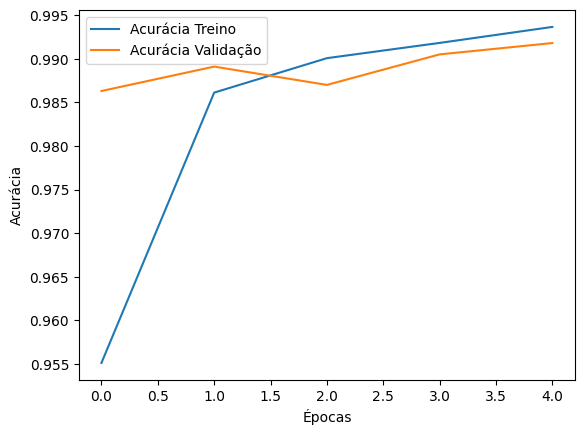

In [16]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Acurácia Treino')
plt.plot(history.history['val_accuracy'], label='Acurácia Validação')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()
plt.show()

In [17]:
import numpy as np

# Prever as classes para os dados de teste
y_true = test_labels
y_pred = np.argmax(model1.predict(test_images, batch_size=32, verbose=0), axis=-1)

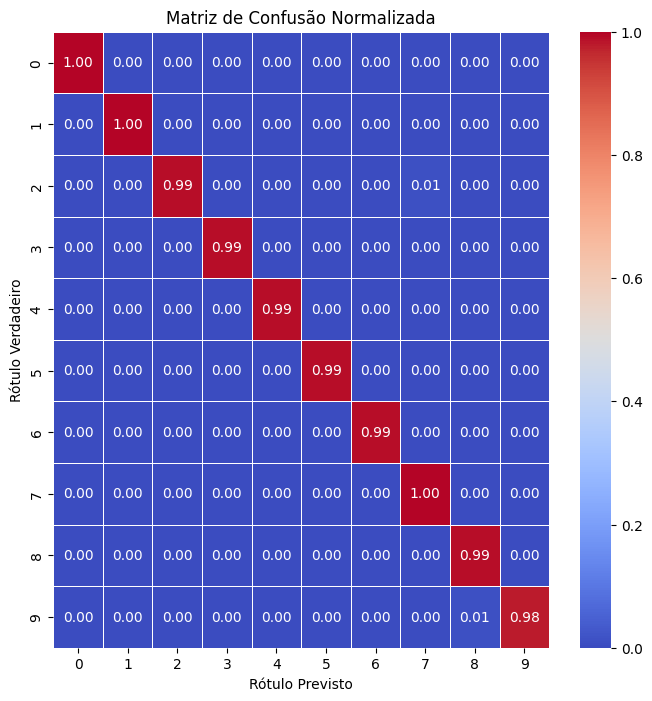

In [18]:
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Criar a matriz de confusão
com_mat = tf.math.confusion_matrix(labels=y_true, predictions=y_pred).numpy()

# Normalizar a matriz de confusão para obter proporções
com_mat_norm = np.around(com_mat.astype('float') / com_mat.sum(axis=1)[:, np.newaxis], decimals=2)
com_mat_norm = np.nan_to_num(com_mat_norm)  # Corrige divisões por zero

# Criar um DataFrame para facilitar a visualização
com_mat_df = pd.DataFrame(com_mat_norm, index=classes, columns=classes)

# Criar o heatmap
plt.figure(figsize=(8, 8))
sns.heatmap(com_mat_df, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Ajustar rótulos
plt.title("Matriz de Confusão Normalizada")
plt.ylabel("Rótulo Verdadeiro")
plt.xlabel("Rótulo Previsto")
plt.show()

In [19]:
model1.save("modelo_mnist.keras")